In [ ]:
import pandas as pd
%matplotlib inline

In [3]:
dates = ['ErlStart', 'LatestFin', 
       'Order Release',  'Scheduled finish date',  'Reqmt Date',
        'EXEC', 'TECO',  'Res.Create']

In [4]:
df = pd.read_excel("GoM Daily Work Order data report v2 (1) (1).xlsx", parse_dates = dates)

In [5]:
df.head()

,Order,Planner Group,Order Desc.,Plant Section,Plant Section Desc.,ErlStart,LatestFin,WBS Element,Mn.wk.ct,Functional Location,...,Reqmt Qty,UoM,Wdrawn Qty,Operation Desc.,System Status,Order User Status,Line Status,Original ROS Date,CLSD,Staging Location
0,60975188,508,XV-12202A-912 Fails to Open,S18,Water Systems,2020-02-06,2019-10-30,O.US.STO.STO.005.724FP,508ACR,US.WR508A.GU.WS.XV-12202A-912,...,3,EA,3.0,LOTO System - Confirm Isolation,TECO CNF PRT GMPS PRC SETC,XCNF MAGN WPOK XGI,TECO,NaN,NaN,PU AMW 12/29/19
1,60714280,508,Upgrade AT-77202-342 Dewpoint Analyzer,S39,Gas Treating,2020-02-07,2020-04-28,O.US.STO.STO.005.724FP,508ACR,US.WR508A.GT.DE.AT-77202-342,...,1,EA,1.0,Upgrade AT-77202-342,REL PCNF ESTC GMPS PPRT PRC SETC,SCHD EOM MAGN RUSH WPOK,EXEC,NaN,NaN,NaN
2,60548443,508,Hawser reel anchor link arm,S19,Marine Systems,2020-04-21,2020-09-30,O.US.STO.STO.005.724FP,508COPER,US.WR508A.MA.PS.ZZZ-88630,...,1,EA,0.0,LOTO Hawser reel,REL ESTC PRC SETC,APPR MAGN RUSH WPOK ZPMM ZPVS,Approved,NaN,NaN,NaN
3,60729276,508,O/SI Valve Stuck in Closed Position,S18,Water Systems,2020-02-20,2019-11-30,O.US.STO.STO.005.724FP,508ERENG,US.WR508A.GU.WS.122-131V,...,16,EA,16.0,Replace Butterfly Valve,REL CNF PRT GMPS PRC SETC,SCHD EOM MAGN RUSH WPOK,EXEC,NaN,NaN,PU Aaron 07/08/2019
4,30289818,508,Turritella Solids Handling Equipment,NaN,NaN,2020-02-25,NaT,C.US.STO.FI.18.012.1230A,NaN,NaN,...,10,EA,10.0,Shop Order Sheets - Mech Mat. for Fab.,ACAS PCNF PRC PREL,INIT,Approved,NaN,NaN,NaN


In [40]:
df['compliant'] = [1 if x>y else 0 for x,y in zip(df['Scheduled finish date'], df['LatestFin'])]

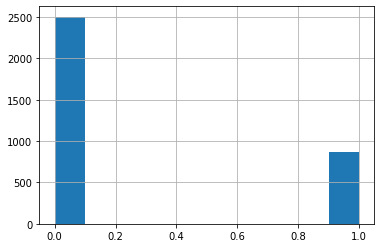

In [41]:
df['compliant'].hist()

In [49]:
import numpy as np
df['delta-exec-teco'] = [x-y if not np.isnat(x) and not np.isnat(y) else np.nan() for x,y in zip(df['TECO'],df['EXEC'])]

TypeError: ufunc 'isnat' is only defined for datetime and timedelta.

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

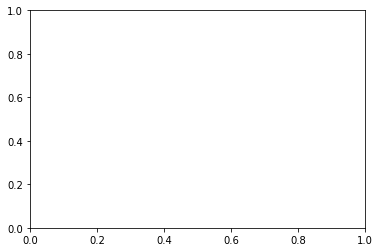

In [44]:
df['delta-exec-teco'].hist()

In [48]:
np.isnat(df['TECO'])

0       False
1        True
2        True
3        True
4        True
        ...  
3369     True
3370    False
3371     True
3372    False
3373     True
Name: TECO, Length: 3374, dtype: bool